In [1]:
import sys
sys.path.append('../ptitprince/')
from collections import namedtuple
Circle = namedtuple("Circle", "x y r")
import pandas as pd
import numpy as np
import scipy as sp
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
from matplotlib.lines import Line2D
from math import log10
import math
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib import colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import os.path
import csv
import gc
import copy
import os

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [2]:
DATA_DIR="/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm"
#robots = [4, 6]
seeds = [i for i in range(1, 30)]
print(seeds)
robots = [2,4,6,10,20,40,60,80,100,120]
rab_ranges = [4,8,12]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [3]:
def get_name(n_robot,seed,range):
    fname = DATA_DIR +'/'+'perf_movement_congestion_'+str(n_robot)+'_'+str(range)+'_'+str(seed)+'.txt'
    print(fname)
    return fname

In [4]:
def column_position(n_robot,seed,range):
    fname = DATA_DIR +'/'+'pos_movement_congestion_'+str(n_robot)+'_'+str(range)+'_'+str(seed)+'.txt'
    print(fname)
    return fname

In [5]:
def get_names_f(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('collision_'+str(k))
        n.append('state_'+str(k))
        n.append('estimate_'+str(k))
        n.append('white_nei_'+str(k))
        n.append('black_nei_'+str(k))
        n.append('white_nei_agg_'+str(k))
        n.append('black_nei_agg_'+str(k))
        n.append('decision_flag_'+str(k))

    
    n.append('exp_finished')
    return n

In [6]:
def get_names_for_position(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('x_'+str(k))
        n.append('y_'+str(k))
        n.append('state_'+str(k))
    
    n.append('exp_finished')
    return n

Total collision per robot in the whole experiment, time_taken and estimate average. 

In [7]:
total_collision = pd.DataFrame()
total_time = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        for seed in seeds: 
        

            fname = get_name(robot,seed,range_)
            try:
                perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))
            except:
                print("error in reading file for seed: ",seed," and robot: ",robot," and range: ",range_)
                continue
            df = pd.DataFrame(data=perf_frame)

            collision_sum = pd.DataFrame() 
            time_ = pd.DataFrame()
            # print(df)
        
            collision = df.filter(regex='collision').tail(1).reset_index(drop=True)
            collision_sum['exp_finished']  = df['exp_finished'].tail(1).reset_index(drop=True)
            collision_sum['collision_sum'] = collision.sum(axis='columns')/(robot*10)
            collision_sum['number_of_robots'] = robot
            collision_sum['seed'] = seed
            collision_sum['range'] = range_/10

            time_= df['exp_finished'].tail(1).reset_index()
            time_.rename(columns={'index':'time'}, inplace=True)
            time_['time'] = time_['time']/10
            time_['number_of_robots'] = robot
            time_['seed'] = seed
            time_['range'] = range_/10


            total_collision = pd.concat([total_collision,collision_sum], ignore_index=True)    
            total_time = pd.concat([total_time,time_], ignore_index=True) 



# print(perf_frame)

#total collisions for experiment 
# print(perf_frame[)
print(total_collision)
print(total_time)


/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_2_4_1.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_2_4_2.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_2_4_3.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_2_4_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_2_4_5.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_2_4_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_2_4_7.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_file

/tmp/ipykernel_20112/362169645.py:11: DtypeWarning: Columns (8,17,26,35,44,53,62,71,80) have mixed types. Specify dtype option on import or set low_memory=False.
  perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))


/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_60_4_16.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_60_4_17.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_60_4_18.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_60_4_19.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_60_4_20.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_60_4_21.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/perf_movement_congestion_60_4_22.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/f

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(total_collision[(total_collision['number_of_robots']==100) & (total_collision['range']==0.4
                                                              
                                                              )])

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(total_time[(total_time['number_of_robots']==100) & (total_time['range']==0.8
                                                              
                                                              )])

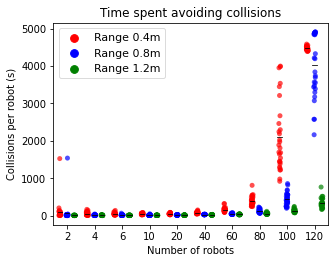

In [8]:
dx="number_of_robots"
dy="collision_sum"
dhue="range"
pal=["red","blue","green"]
data = total_collision

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Time spent avoiding collisions")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Collisions per robot (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("move_cong_collision_time_spent_pm.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

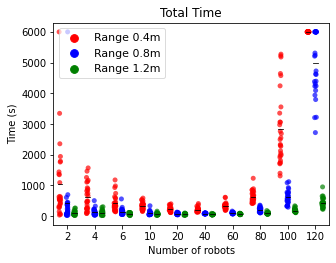

In [65]:
dx="number_of_robots"
dy="time"
dhue="range"
pal=["red","blue","green"]
data = total_time

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=12,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("move_cong_time_spent_pm.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

Per State analysis for time and collisions

In [ ]:
total_state_collision = pd.DataFrame()
total_state_time = pd.DataFrame()

for robot in robots:
    for seed in seeds: 

        fname = get_name(robot,seed)
        perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))
        df = pd.DataFrame(data=perf_frame)
        collision_state = pd.DataFrame() 
        time_per_state = pd.DataFrame()

        state = df.filter(regex='state')
        collision = df.filter(regex='collision').diff()

        state = state.melt(var_name='columns', value_name='index')
        collision = collision.melt(var_name='col_collision', value_name='ind_collision')
        collision_state = pd.concat([state,collision], axis = 1)
        collision_state.drop(collision_state.index[collision_state['ind_collision'] == 0], inplace = True)
        collision_state = collision_state.filter(regex=r'index|columns').reset_index(drop=True)


        state = pd.crosstab(index=state['index'], columns=state['columns'])
        collision_state = pd.crosstab(index=collision_state['index'], columns=collision_state['columns'])
        state["sum"] = state.sum(axis=1)/(robot*10)
        collision_state["sum"] = collision_state.sum(axis=1)/(robot*10)

        state = state.drop(state.columns[0:state.shape[1]-1], axis=1)
        collision_state = collision_state.drop(collision_state.columns[0:collision_state.shape[1]-1], axis=1)

        state['state'] = state.index 
        collision_state['state'] = collision_state.index

        state['seed'] = [seed]*state.shape[0]
        state['number_of_robots'] = [robot]*state.shape[0]
        collision_state['seed'] = [seed]*collision_state.shape[0]
        collision_state['number_of_robots'] = [robot]*collision_state.shape[0]

        total_state_time = pd.concat([total_state_time,state])
        total_state_collision = pd.concat([total_state_collision,collision_state])



total_state_time.sort_values(by=['state'], inplace=True)
total_state_collision.sort_values(by=['state'], inplace=True)

total_state_time_black = total_state_time.filter(regex='black',axis=0)
total_state_collision_black = total_state_collision.filter(regex='black',axis=0)
total_state_time_white = total_state_time.filter(regex='white',axis=0)
total_state_collision_white = total_state_collision.filter(regex='white',axis=0)


In [ ]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_time_black

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state spent avoiding collisions")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

In [ ]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_collision_black

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total collision time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

In [ ]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_collision_white

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state spent avoiding collisions")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total collision time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()
        

Visitation frequency in a grid fashion 


In [ ]:

for robot in robots:
   for seed in seeds:

        black_values = ['black_followers','nesters_black','decision_makers_black','black_exploration']
        white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']


        fname = column_position(robot,seed)
        print(fname)
        pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))

        df = pd.DataFrame(pos_frame)
        df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
        df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
        df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
        df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
        df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
        state = df.filter(regex='state').melt()

        df.drop(df.filter(regex='state').columns, axis=1, inplace=True)

        positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
        positionalDf = positionalDf.melt()
        positionalDf = positionalDf.rename(columns={"variable": "robot", "value": "position"})
        positionalDf["state"] = state["value"]

        positionalDf_black = positionalDf.loc[positionalDf['state'].isin(black_values)].reset_index(drop=True)
        positionalDf_white = positionalDf.loc[positionalDf['state'].isin(white_values)].reset_index(drop=True)

        x = list(positionalDf_white['position'].apply(lambda x: x[0]))
        y = list(positionalDf_white['position'].apply(lambda y: y[1]))

        f, ax = plt.subplots(figsize=(5.5,4.75))
        plt.rc('xtick', labelsize=10) 
        plt.rc('ytick', labelsize=10) 
        plt.title("Heatmap for white robots:" + str(robot) + " seed: "+str(seed))
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.imshow(heatmap, origin='lower', extent=extent)
        plt.colorbar()
        plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
        ax.set_ylabel("x (m)",fontsize=10)
        ax.set_xlabel("y (m)",fontsize=10)
        plt.tight_layout(pad=0.1)
        plt.savefig("heatmap_white_"+str(robot)+"_"+str(seed)+".pdf", dpi=600, format="pdf", transparent=False)
        plt.clf()        

        x = list(positionalDf_black['position'].apply(lambda x: x[0]))
        y = list(positionalDf_black['position'].apply(lambda y: y[1]))

        heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
        
        f, ax = plt.subplots(figsize=(5.5,4.75))
        plt.rc('xtick', labelsize=10) 
        plt.rc('ytick', labelsize=10) 
        plt.title("Heatmap for black robots:" + str(robot) + " seed: "+str(seed))
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.imshow(heatmap, origin='lower', extent=extent)
        plt.colorbar()
        plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
        plt.tight_layout(pad=1)
        ax.set_ylabel("x (m)",fontsize=10)
        ax.set_xlabel("y (m)",fontsize=10)
        plt.tight_layout(pad=0.1)
        plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.8], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
        plt.savefig("heatmap_black_"+str(robot)+"_"+str(seed)+".pdf", dpi=600, format="pdf", transparent=False)
        plt.clf()





In [ ]:

# plt.show()

In [ ]:
x = list(positionalDf_black['position'].apply(lambda x: x[0]))
y = list(positionalDf_black['position'].apply(lambda y: y[1]))

# print(positionalDf_black['position'])
# print(x)
# print(y)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
print(extent)
plt.imshow(heatmap, origin='lower', extent=extent)

#plt.clim(0,30000) 
plt.colorbar()
plt.savefig("heatmap_black.pdf", dpi=600, format="pdf", transparent=False)
# plt.show()

In [9]:
seeds = [i for i in range(1, 30)]
print(seeds)
robots = [10,40,80,120]
rab_ranges = [8]

exp_x = []
exp_y = []

for robot in robots:
   for range_ in rab_ranges:
      positionalDf_black = pd.DataFrame()
      positionalDf_white = pd.DataFrame()
         
      for seed in seeds:
            white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']
            fname = column_position(robot,seed,range_)
            #print(fname)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))

            df = pd.DataFrame(pos_frame)
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            state = df.filter(regex='state').melt()

            df.drop(df.filter(regex='state').columns, axis=1, inplace=True)

            positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
            positionalDf = positionalDf.melt()
            positionalDf = positionalDf.rename(columns={"variable": "robot", "value": "position"})
            positionalDf["state"] = state["value"]

            #positionalDf_black = pd.concat([positionalDf_black,positionalDf.loc[positionalDf['state'].isin(black_values)].reset_index(drop=True)], ignore_index=True) 
            
            position = positionalDf.loc[positionalDf['state'].isin(white_values)].reset_index(drop=True)
            x = position['position'].apply(lambda x: x[0])
            y = position['position'].apply(lambda y: y[1])
            exp_x.append(x)
            exp_y.append(y)
      
      x = pd.concat(exp_x, ignore_index=True)
      y = pd.concat(exp_y, ignore_index=True)
      
      f, ax = plt.subplots(figsize=(4.6,4))
      plt.rc('xtick', labelsize=10) 
      plt.rc('ytick', labelsize=10) 
      plt.title("No of robots: "+str(robot))
      
      heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=True)
      extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
      plt.imshow(heatmap, origin='lower', extent=extent,cmap='RdBu')
      if (robot==120):
            plt.colorbar(fraction=0.046, pad=0.04)
      plt.clim(0,0.6)
      plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      if (robot==10):
            ax.set_ylabel("zone A samplers\n x (m)",fontsize=10)
      else:
            ax.set_ylabel("x (m)",fontsize=10)
      ax.set_xlabel("y (m)",fontsize=10)
      plt.tight_layout(pad=0.2)
      plt.xticks(np.arange(-2,2.5,0.5))
      plt.yticks(np.arange(-2,2.5,0.5))
      plt.savefig("heatmap_white_move_congestion_pm"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
      plt.clf()       

      # x = list(positionalDf_black['position'].apply(lambda x: x[0]))
      # y = list(positionalDf_black['position'].apply(lambda y: y[1]))

      # f, ax = plt.subplots(figsize=(5.5,4.75))
      # plt.rc('xtick', labelsize=10) 
      # plt.rc('ytick', labelsize=10) 
      # plt.title("Heatmap for black robots:" + str(robot) + " range: "+str(range_/10))
      # heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
      # extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
      # plt.imshow(heatmap, origin='lower', extent=extent)
      # plt.colorbar()
      # plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      # plt.tight_layout(pad=1)
      # ax.set_ylabel("x (m)",fontsize=10)
      # ax.set_xlabel("y (m)",fontsize=10)
      # plt.tight_layout(pad=0.1)
      # plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.8], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      # plt.savefig("heatmap_black_move_congestion"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
      # plt.clf()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_1.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_2.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_3.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_5.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos_movement_congestion_10_8_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/move_congestion_pm/pos

<Figure size 331.2x288 with 0 Axes>

<Figure size 331.2x288 with 0 Axes>

<Figure size 331.2x288 with 0 Axes>

<Figure size 331.2x288 with 0 Axes>

In [8]:
x = pd.concat(exp_x, ignore_index=True)

In [9]:
y = pd.concat(exp_y, ignore_index=True)

<Figure size 396x342 with 0 Axes>